### Linear Regression with Batch Gradient Descet from scratch (No SKLearn)


In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
%matplotlib inline

plt.style.use('seaborn-darkgrid')

# N samples
N = 100

In [2]:
# create N number of features
X = np.arange(N+1).reshape(-1,1)

# create corresponding linearly correlated y's and add some random noise
y = 1.5*X + 2
noise = np.random.normal(0, 30, N+1).reshape(-1,1)
y = y + noise

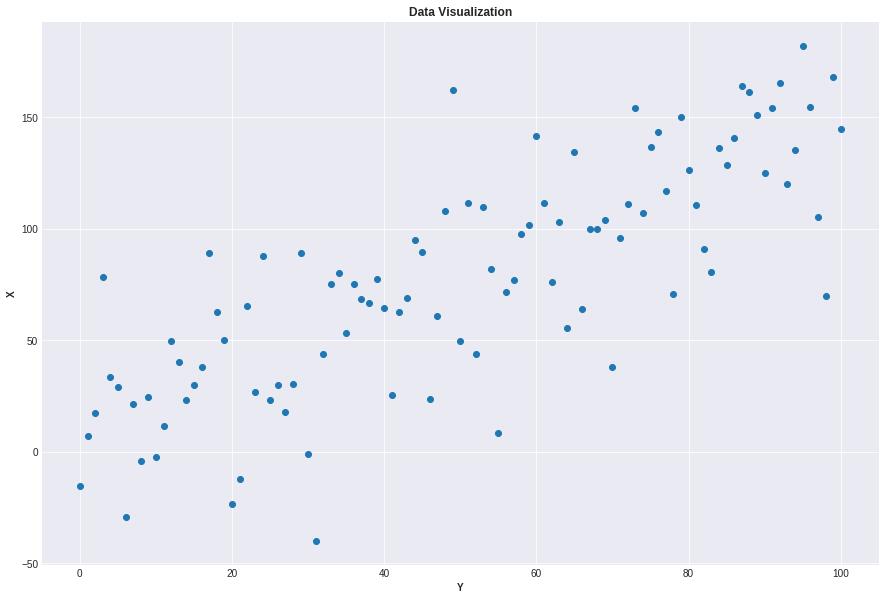

In [3]:
# plot data
plt.figure(figsize=(15,10))
plt.scatter(X, y, marker='o')
plt.title('Data Visualization', fontweight='bold')
plt.xlabel('Y', fontweight='bold')
plt.ylabel('X', fontweight='bold')
plt.show();

y_hat = mx + b

where m is the slope
and b is y intersect, both are parameters to learn

In [4]:
def predict(y_intersect, slope, X):
    """
    This function will make a prediction based on given parameters. mx + b where:
    :param y_intersect: b
    :param slope: m
    :param X: x
    :return: array of predictions.
    """
    
    # adds a column of 1's at the beggining of X (features)
    # to be able to do matrix multiplication on y_intersect.
    X = np.insert(X, 0, values=1, axis=1)
    
    # create a numpy vector that contains the parameters, reshape to be a vector
    # also makes sure to reshape as a vector otherwise it can behave strangely.
    parameters = np.array([y_intersect, slope]).reshape(2,1)
    
    # makes predictions by multiplying each parameter in this case: y intersect and the slope.
    predictions = np.dot(X, parameters)
    
    return predictions 

In [5]:
def get_cost(y_hat, y):
    """
    This functions calculates the RMSE, the distances from y_hat's (predictions) to every y.
    :param y_hat: predictions.
    :param y: actual values.
    :return: cost RMSE.
    """
    
    # total number of samples
    m = y.shape[0]
    
    # RMSE
    cost = (np.sum(y_hat - y)/m)**2
    
    return cost


In [6]:
def gradient_descent(X, y, learning_rate=0.0001, iterations=1000):
    """
    This function does (good old) batch regular gradient descent, on the whole dataset (batch).
    :param learning_rate: shoul be kept small for visualization.
    :param iterations: 
    :param X: by convetion capital parameter is a matrix, in this case is the feature matrix.
    :param y: by convention lowercase parameter is a vector, in this case is the y training labels.
    :return: best y_intersect, slope found.
    """

    # m is the number of training examples (or rows in the matrix)
    m = X.shape[0]
    
    # we initialize gradient descent with some values.
    y_intersect = -10
    slope = 0

    # creating tracking dictionaty for plotting from initial values
    tracking = {'iterations':[],'costs':[],'y_intersects':[], 'slopes':[]}
    
    # creating figure and plots
    fig = plt.figure(figsize=(18,5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133, projection='3d') # 3D gradient descent plot
    fig.suptitle('Linear Regression with Batch Gradient Descent', fontweight='bold')
    
    # for every iterations we update both parameters at the same time, hence we store them on a temp variable
    for iteration in range(iterations):
        tracking['iterations'].append(iteration)
        
        # first make predictions on the current parameters
        y_hat = predict(y_intersect, slope, X)

        # this formula gets the gradients at the given position.
        temp_y_intersect =  y_intersect - learning_rate * (np.sum(y_hat - y)/m)
        temp_slope = slope - learning_rate * (np.sum((y_hat - y) * X)/m)
        
        # simultaneous update for parameters
        y_intersect = temp_y_intersect
        slope = temp_slope
        
        tracking['y_intersects'].append(y_intersect)
        tracking['slopes'].append(slope)
        
        # calculate the cost to be ploted on the graph
        tracking['costs'].append(get_cost(y_hat, y))
        
        if iteration % 10 == 0:
            ax1.cla()
            ax2.cla()
            ax3.cla()

            ax1.scatter(X, y, marker='.', c='blue',)
            ax1.plot(X, predict(y_intersect, slope , X), linewidth=2, c='orange', label='Best Fit Line')         
            ax1.set_title('Linear Regression', fontweight='bold')
            ax1.set_xlabel('X', fontweight='bold')
            ax1.set_ylabel('Y', fontweight='bold')
            ax1.legend()

            ax2.plot(tracking['iterations'], tracking['costs'], linewidth=2, c='green',)
            ax2.set_title('Cost Over Time', fontweight='bold')
            ax2.set_xlabel('Iterations', fontweight='bold')
            ax2.set_ylabel('Cost', fontweight='bold')
            ax2.legend([f"Cost over time: {tracking['costs'][iteration]:.3f}"])
            
            ax3.plot(tracking['slopes'], tracking['y_intersects'], tracking['costs'], '--b')
            ax3.set_title('Gradient Descent', fontweight='bold')
            ax3.set_xlabel('slopes', fontweight='bold')
            ax3.set_ylabel('y_intersects', fontweight='bold')
            ax3.set_zlabel('Cost', rotation=90, fontweight='bold')
            ax3.legend([f"Cost: {tracking['costs'][iteration]:.3f}"])

            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(0.1)

    return y_intersect, slope

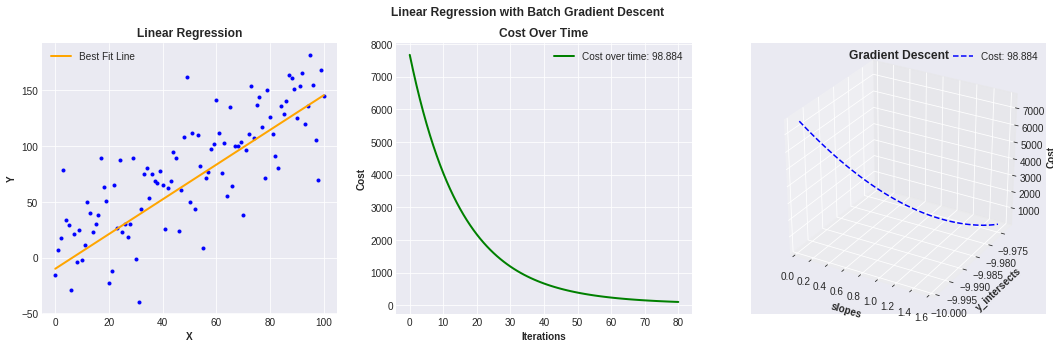

In [ ]:
# picking really slow learning rate to get a nice animation
best_y_intersect, best_slope = gradient_descent(X, y, learning_rate=0.00001, iterations=500)